# Additional Visualizations

## General SOTA DP-Performance Graph
Display performance of non-adapted SOTA models under DP, compared to their performance without DP.

In [2]:
import numpy as np
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: automate fetching data

### Model - SOTA ###
# perf data
dp_performances = np.array([0.266, 0.410, 0.447, 0.393, 0.423, 0.607, 0.561, 0.455, 0.462, 0.419, 0.418, 0.574, 
                            0.419, 0.418, 0.396, 0.363, 0.497, 0.478, 0.474, 0.482, 0.480])
nodp_performances = np.array([0.775, 0.792, 0.716, 0.731, 0.665, 0.725, 0.720, 0.689, 0.714, 0.664, 0.573, 0.720, 
                            0.664, 0.660, 0.623, 0.568, 0.815, 0.784, 0.758, 0.736, 0.808])

# grad data (GGN of best run)
dp_GGNs = np.array([9.628, 5.646, 16.303, 27.168, 32.376, 13.590, 12.229, 24.032, 15.785, 8.488, 9.139, 11.044, 
                    8.488, 7.302, 6.250, 4.638, 5.068, 4.969, 4.478, 5.367, 5.939])
nodp_GGNs = np.array([3.787, 0.774, 6.375, 4.919, 6.505, 5.241, 5.486, 7.790, 5.007, 7.418, 6.929, 5.386,
                    7.418, 7.278, 6.700, 5.040, 0.380, 0.836, 1.004, 0.981, 0.465])

# search data (params of best DP-runs)
best_L2_clips = np.array([0.193, 9.796, 7.557, 2.294, 1.963, 5.396, 7.788, 4.825, 6.888, 8.709, 8.667, 8.297,
                          8.709, 8.295, 7.759, 9.946, 9.957, 9.824, 9.464, 7.659, 8.300])
best_epochs = np.array([14, 25, 25, 25, 25, 14, 14, 25, 25, 25, 25, 25, 
                        25, 25, 14, 25, 25, 25, 25, 25, 14])

# model meta
model_names_sota = np.array(["VGG11_GN", "ResNet18_GN", "ResNet50_GN", "WideResNet50_GN", "ResNet152_GN", 
                            "DenseNet121_GN", "DenseNet201_GN", "GoogLeNet_GN", "Xception_GN", "MobileNetV1_W100_GN", 
                            "EfficientNetB0_GN", "DenseNet169_GN", "MobileNetV1_GN", "MobileNetV1_x075_GN", 
                            "MobileNetV1_x050_GN", "MobileNetV1_x025_GN", "ResNet18_GN_2", "ResNet18x075GN", 
                            "ResNet18x050GN", "ResNet18x025GN", "ResNet18_LN"])
model_sizes = np.array([128000, 11200, 23500, 66900, 58200, 7000, 18100, 10000, 20800, 3200, 4000, 12500, 
                        3200, 1800, 839, 223, 11200, 8000, 5300, 3400, 11200]) # in K

# Create Pandas DataFrame for all experiments
runs_df = pd.DataFrame(
    {
        "model":model_names_sota,
        "size":model_sizes, 
        "dp_performance":dp_performances, 
        "nodp_performance":nodp_performances, 
        "dp_GGN":dp_GGNs, 
        "nodp_GGN":nodp_GGNs, 
        "best_L2":best_L2_clips, 
        "best_epoch":best_epochs,
        "SOTA":[True]*len(model_names_sota),
    },
)

### Model - DEPTH ###
# perf data
dp_performances = np.array([0.493, 0.467, 0.442, 0.439, 0.397, 0.344])
nodp_performances = np.array([0.658, 0.665, 0.618, 0.598, 0.099, 0.099])

# grad data (GGN of best run)
dp_GGNs = np.array([6.094, 8.759, 9.960, 11.094, 13.099, 12.930])
nodp_GGNs = np.array([4.519, 6.052, 6.691, 7.292, 0.172, 0.176])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.545, 9.951, 9.978, 9.610, 9.983, 9.971])
best_epochs = np.array([25, 25, 25, 25, 14, 25])

# model meta
model_names_depth = np.array(["Depth 1.0", "Depth 2.0", "Depth 3.0", "Depth 4.0", "Depth 6.0", "Depth 8.0"])
model_sizes = np.array([101, 104, 107, 110, 115, 121]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_depth,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_depth),
        },
    )
)

### Model - WIDTH ###
# perf data
dp_performances = np.array([0.493, 0.497, 0.491, 0.506, 0.493, 0.496])
nodp_performances = np.array([0.658, 0.700, 0.706, 0.729, 0.756, 0.749])

# grad data (GGN of best run)
dp_GGNs = np.array([6.094, 6.483, 6.506, 7.355, 7.903, 8.398])
nodp_GGNs = np.array([4.519, 3.906, 4.199, 3.272, 2.537, 3.074])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.545, 9.829, 9.573, 9.766, 9.207, 9.992])
best_epochs = np.array([25, 25, 14, 25, 25, 14])

# model meta
model_names_width = np.array(["Width 1.0", "Width 1.4", "Width 1.8", "Width 2.6", 
                        "Width 3.8", "Width 5.0"])
model_sizes = np.array([101, 127, 153, 210, 297, 392]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_width,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_width),
        },
    )
)

### Model - SKIP 1 | Residual Model MXP ###
# perf data
dp_performances = np.array([0.487, 0.456, 0.464, 0.475, 0.427, 0.420])
nodp_performances = np.array([0.689, 0.648, 0.612, 0.699, 0.625, 0.716])

# grad data (GGN of best run)
dp_GGNs = np.array([7.941, 10.262, 8.571, 15.335, 19.654, 61.571])
nodp_GGNs = np.array([4.505, 3.926, 4.013, 4.813, 5.179, 7.124])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.984, 9.818, 9.884, 8.573, 7.379, 3.911])
best_epochs = np.array([25, 14, 25, 14, 14, 25])

# model meta
model_names_res = np.array(["W10D20 Base Model Skip", "W10D80 Base Model Skip", "W10D10 Residual Model MXP", 
                        "W50D10 Residual Model MXP", "W10D80 Residual Model MXP", "W50D80 Residual Model MXP"])
model_sizes = np.array([104, 121, 103, 447, 143, 1500]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_res,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_res),
        },
    )
)

### Model - SKIP 2 | Dense Model MXP ###
# perf data
dp_performances = np.array([0.481, 0.519, 0.594, 0.572, 0.497, 0.497, 0.569])
nodp_performances = np.array([0.653, 0.744, 0.798, 0.750, 0.731, 0.791, 0.839])

# grad data (GGN of best run)
dp_GGNs = np.array([6.656, 9.909, 7.883, 10.600, 19.715, 53.090, 34.975])
nodp_GGNs = np.array([4.074, 4.228, 2.848, 4.654, 4.848, 5.073, 2.278])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.893, 9.377, 9.430, 8.930, 8.522, 4.777, 4.521])
best_epochs = np.array([25, 14, 25, 25, 14, 14, 25])

# model meta
model_names_dense = np.array(["W10D10 Dense Model MXP", "W50D10 Dense Model MXP", "W80D10 Dense Model MXP",
                        "W10D50 Dense Model MXP", "W10D80 Dense Model MXP", "W50D80 Dense Model MXP", 
                        "W80D50 Dense Model MXP"])
model_sizes = np.array([100, 379, 600, 145, 222, 3400, 3400]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_dense,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_dense),
        },
    )
)

### Model - LN ###
# perf data
dp_performances = np.array([0.506, 0.506, 0.460, 0.483])
nodp_performances = np.array([0.645, 0.739, 0.622, 0.732])

# grad data (GGN of best run)
dp_GGNs = np.array([4.860, 6.129, 7.326, 12.054])
nodp_GGNs = np.array([4.580, 2.217, 4.843, 2.517])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.974, 8.088, 8.963, 6.414])
best_epochs = np.array([25, 25, 14, 25])

# model meta
model_names_LN = np.array(["W10D10 Residual Model LN", "W50D10 Residual Model LN", 
                        "W10D80 Residual Model LN", "W50D80 Residual Model LN"])
model_sizes = np.array([103, 447, 144, 1500]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_LN,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_LN),
        },
    )
)

### Model - IN ###
# perf data
dp_performances = np.array([0.426, 0.430, 0.362, 0.338])
nodp_performances = np.array([0.608, 0.745, 0.634, 0.762])

# grad data (GGN of best run)
dp_GGNs = np.array([4.352, 6.079, 9.248, 12.056])
nodp_GGNs = np.array([4.117, 2.727, 5.156, 2.997])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.971, 6.410, 6.434, 2.811])
best_epochs = np.array([14, 25, 14, 25])

# model meta
model_names_IN = np.array(["W10D10 Residual Model IN", "W50D10 Residual Model IN", 
                        "W10D80 Residual Model IN", "W50D80 Residual Model IN"])
model_sizes = np.array([103, 447, 143, 1500]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_IN,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_IN),
        },
    )
)

### Model - GN ###
# perf data
dp_performances = np.array([0.437, 0.469, 0.515, 0.458, 0.370, 0.432, 0.505])
nodp_performances = np.array([0.632, 0.755, 0.741, 0.641, 0.662, 0.762, 0.758])

# grad data (GGN of best run)
dp_GGNs = np.array([4.889, 6.646, 7.384, 6.734, 8.404, 14.473, 13.802])
nodp_GGNs = np.array([4.144, 1.985, 1.197, 4.422, 4.480, 1.284, 2.105])

# search data (params of best DP-runs)
best_L2_clips = np.array([9.099, 6.301, 5.104, 6.250, 5.272, 7.163, 4.619])
best_epochs = np.array([25, 14, 25, 25, 25, 14, 25])

# model meta
model_names_GN = np.array(["W10D10 Residual Model GN", "W50D10 Residual Model GN", 
                        "W80D10 Residual Model GN", "W10D50 Residual Model GN",
                        "W10D80 Residual Model GN", "W50D80 Residual Model GN", 
                        "W80D50 Residual Model GN"])
model_sizes = np.array([103, 447, 777, 126, 144, 1500, 2300]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_GN,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_GN),
        },
    )
)

### Model - MXP_GN ###
# perf data
dp_performances = np.array([0.451, 0.538, 0.322, 0.490])
nodp_performances = np.array([0.573, 0.732, 0.590, 0.716])

# grad data (GGN of best run)
dp_GGNs = np.array([4.440, 7.721, 10.723, 11.417])
nodp_GGNs = np.array([4.822, 3.150, 5.735, 3.404])

# search data (params of best DP-runs)
best_L2_clips = np.array([8.143, 6.868, 6.233, 8.272])
best_epochs = np.array([25, 25, 25, 14])

# model meta
model_names_MXP_GN = np.array(["W10D10 Residual Model MXP_GN", "W50D10 Residual Model MXP_GN", 
                        "W10D80 Residual Model MXP_GN", "W50D80 Residual Model MXP_GN"])
model_sizes = np.array([103, 447, 144, 1500]) # in K

# append to overall DF
runs_df = runs_df.append(
    pd.DataFrame(
        {
            "model":model_names_MXP_GN,
            "size":model_sizes, 
            "dp_performance":dp_performances, 
            "nodp_performance":nodp_performances, 
            "dp_GGN":dp_GGNs, 
            "nodp_GGN":nodp_GGNs, 
            "best_L2":best_L2_clips, 
            "best_epoch":best_epochs,
            "SOTA":[False]*len(model_names_MXP_GN),
        },
    )
)
# to index directly with model names (model names can be returned with runs_df.index)
runs_df.set_index("model", inplace=True)

In [3]:
def select_models(all_models: List[str], key_words: List[str], separator: str = " "):
    """
        Takes in a list model names, words to filter by, and a seperator 
        to seperate the words in the model names.
        Returns a boolean list, returning True if a model contained 
        one of the words in key_words.
    """
    selected_models = []
    for model in all_models:
        for word in model.split(separator):
            if word in key_words:
                selected_models.append(True)
                break
        # no True was appended (no break was called)
        else: 
            selected_models.append(False)
    return selected_models

## Comparing Plots
[JUMP TO VISUALIZE TO DIRECT VISUALIZATION WITHOUT EXTRA COMPARISON]
<br>
<br>
This section compares different groups of models and visualizes them.

In [4]:
all_models = np.concatenate(
    [
        model_names_sota,
        model_names_depth, 
        model_names_width,
        model_names_res,
        model_names_dense,
        model_names_LN, 
        model_names_IN, 
        model_names_GN, 
        model_names_MXP_GN, 
    ]
)

# select columns to compare
# ['size', 'dp_performance', 'nodp_performance', 'dp_GGN', 'nodp_GGN', 'best_L2', 'best_epoch']
selected_columns = ['size', 'dp_performance', 'nodp_performance', 'dp_GGN', 'nodp_GGN', 'best_L2', 'best_epoch']
runs_df = runs_df[selected_columns]

# add extra columns if wanted
runs_df["perf_ratio"] = runs_df["dp_performance"]/runs_df["nodp_performance"]
runs_df["ggn_ratio"] = runs_df["dp_GGN"]/runs_df["nodp_GGN"]

# possible groupings
width_models = runs_df.loc[select_models(all_models, ["Width", "W50D10", "W50D80"])]
depth_models = runs_df.loc[select_models(all_models, ["Depth", "W10D80", "W50D80"])]

small_models = runs_df.loc[select_models(all_models, ["W10D10"])]
wide_models = runs_df.loc[select_models(all_models, ["W50D10"])]
deep_models = runs_df.loc[select_models(all_models, ["W10D80"])]
large_models = runs_df.loc[select_models(all_models, ["W50D80"])]

LN_models = runs_df.loc[select_models(all_models, ["LN"])]
IN_models = runs_df.loc[select_models(all_models, ["IN"])]
GN_models = runs_df.loc[select_models(all_models, ["GN"])]
MXP_GN_models = runs_df.loc[select_models(all_models, ["MXP_GN"])]

base_models = runs_df.loc[select_models(all_models, ["Base", "Depth", "Width"])]
residual_models = runs_df.loc[select_models(all_models, ["Residual"])]
dense_models = runs_df.loc[select_models(all_models, ["Dense"])]

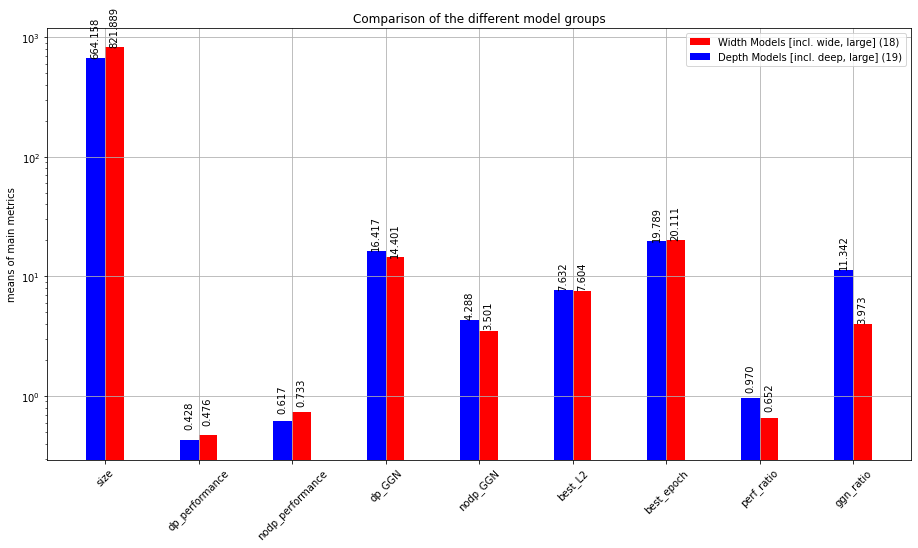

In [5]:
# plot a comparison of the main values
selected_models = [width_models, depth_models]
selected_names = [
    f"Width Models [incl. wide, large] ({len(width_models)})", 
    f"Depth Models [incl. deep, large] ({len(depth_models)})", 
]

colors = ["red", "blue", "green", "orange"]
title = "Comparison of the different model groups"
ylabel = "means of main metrics"
with_numbers = True
width = 0.2

starting_points = [
    (len(selected_models)-1)/2-i
    for i in range(len(selected_models))
]
x_axis = np.arange(len(runs_df.columns))

fig = plt.figure(figsize=(12,6))
axis = fig.add_axes([0,0,1,1])

for i, model in enumerate(selected_models): 
    axis.bar(
        x_axis+starting_points[i]*width, 
        model.mean(), 
        width, 
        label=selected_names[i], 
        color=colors[i],
    )
    if with_numbers:
        for j, pos in enumerate(x_axis):
            number = model.mean().tolist()[j]
            axis.text(
                pos+starting_points[i]*width, 
                number+0.1, 
                "%.3f"%number, 
                ha="center",
                va="bottom", 
                rotation=90,
            )

axis.set_ylabel(ylabel)
axis.set_title(title)

plt.xticks(x_axis, runs_df.columns, rotation=45)
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

## Single Plots
This section is used to plot a list of models, without specific comparisons of different model groups.

In [7]:
# set experiments to visualize
# model_names_depth, model_names_width, model_names_res, model_names_dense, 
# model_names_LN, model_names_IN, model_names_GN, model_names_MXP_GN, model_names_sota

# bool array
selected_models = model_names_dense

# to visualize all models 
select_all = False

# select models
selected_df = runs_df.loc[selected_models] if not select_all else runs_df

# print to check
#selected_df.sort_values("dp_performance", ascending=False)

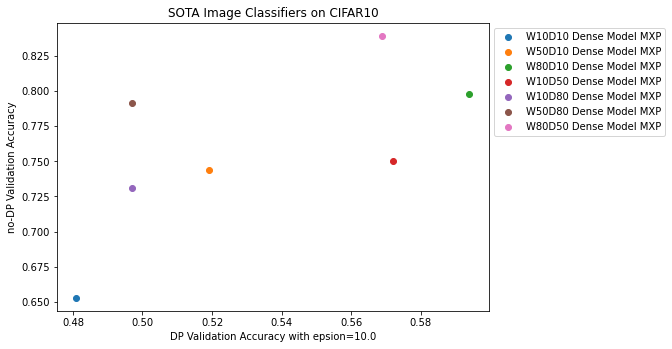

In [8]:
# Plot Nr. 1a - Scatter Plot DP/no-DP SOTA performances
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0, 0, 1, 1])

for i in range(len(selected_df)): 
    axis.scatter(
        selected_df["dp_performance"][i], 
        selected_df["nodp_performance"][i], 
        label=selected_df.index[i]
    )

axis.legend(bbox_to_anchor=(1,1),loc="best")
axis.set_xlabel("DP Validation Accuracy with epsion=10.0")
axis.set_ylabel("no-DP Validation Accuracy")
axis.set_title("SOTA Image Classifiers on CIFAR10")
plt.show()
#plt.scatter(dp_performances, nodp_performances, c='g')

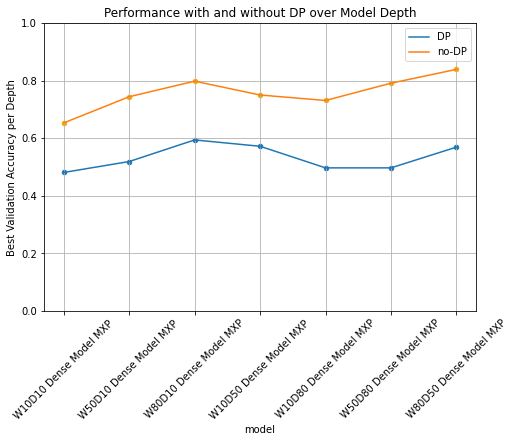

In [9]:
# Plot Nr. 1b - Performance w/ and w/o DP over parameter
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.set_ylim((0,1))

# reset_index() because we use the model as index for df
selected_df.reset_index().plot.scatter("model", "dp_performance", ax=axis, rot=90 if select_all else 45)
selected_df.reset_index().plot("model", "dp_performance", ax=axis, label="DP", rot=90 if select_all else 45)

selected_df.reset_index().plot.scatter("model", "nodp_performance", ax=axis, c="orange", rot=90 if select_all else 45)
selected_df.reset_index().plot("model", "nodp_performance", ax=axis, label="no-DP", rot=90 if select_all else 45)

axis.set_title("Performance with and without DP over Model Depth")
axis.set_ylabel("Best Validation Accuracy per Depth")
plt.grid()

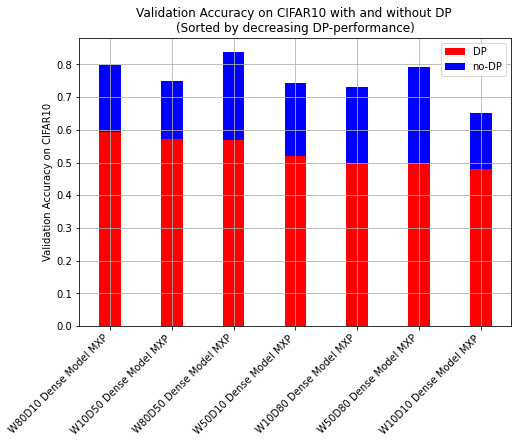

In [10]:
# Plot Nr. 2 - Bar Plot DP/no-DP SOTA performances

# order based on decreasing DP performance
new_dp_performances = selected_df.sort_values("dp_performance", ascending=False)["dp_performance"]
new_nodp_perfomances = selected_df.sort_values("dp_performance", ascending=False)["nodp_performance"]
new_model_names = selected_df.sort_values("dp_performance", ascending=False).index

# calculate difference for plot
diff_nodp_dp = new_nodp_perfomances-new_dp_performances
#assert((diff_nodp_dp<0).sum()==0)

width = 0.35
fig = plt.figure(figsize=(14, 7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(new_model_names, new_dp_performances, width, color='r')
axis.bar(new_model_names, diff_nodp_dp, width, bottom=new_dp_performances, color='b')
axis.set_ylabel('Validation Accuracy on CIFAR10')
axis.set_title('Validation Accuracy on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(rotation=90 if select_all else 45, ha="right")
axis.legend(labels=['DP', 'no-DP'])
plt.grid()
plt.show()

DP performance mean: 45.025000000000006 and std: 8.020091957078797


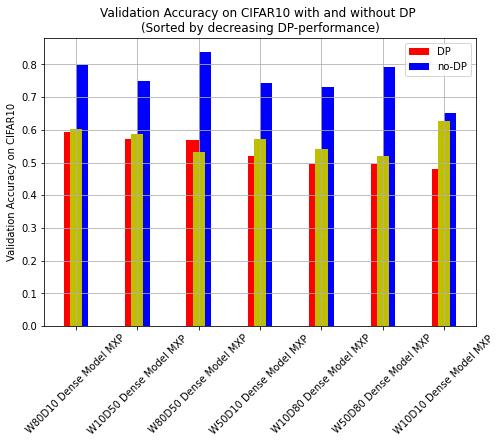

In [14]:
import pandas as pd
# Plot Nr. 2 - Bar Plot DP/no-DP SOTA performances [VERSION 2]

# order based on decreasing DP performance
new_dp_performances = selected_df.sort_values("dp_performance", ascending=False)["dp_performance"]
new_nodp_perfomances = selected_df.sort_values("dp_performance", ascending=False)["nodp_performance"]

new_dp_GGN = selected_df.sort_values("dp_performance", ascending=False)["dp_GGN"]
new_nodp_GGN = selected_df.sort_values("dp_performance", ascending=False)["nodp_GGN"]

new_model_names = selected_df.sort_values("dp_performance", ascending=False).index

print(f"DP performance mean: {dp_performances.mean()*100} and std: {dp_performances.std()*100}")

width = 0.2
x_axis = np.arange(len(selected_df))

# hypothesis that the dp performance is proportional to the nodp-perf
# by factor of the trainability measured by the GGN increase non-related to the #params.
# Ewm for smoothening and sigmoid for squashing to compensate for noisy training. 
# dp-perf ~ (GGN_dp - GGN_nodp)/sqrt(#params) * nodp-perf
alpha = 0.75
sigmoid = lambda x: 1/(1 + np.exp(-x))
special_hypothesis = sigmoid(
        pd.Series(
        np.sqrt(len(new_dp_GGN))/(new_dp_GGN-new_nodp_GGN)*new_nodp_perfomances
    ).ewm(alpha=alpha).mean()
)

fig = plt.figure(figsize=(12,6)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(x_axis-width/2, new_dp_performances, width, label="DP", color='r')
axis.bar(x_axis+width/2, new_nodp_perfomances, width, label="no-DP", color='b')
axis.bar(x_axis,  special_hypothesis, width, color='y')
axis.set_ylabel('Validation Accuracy on CIFAR10')
axis.set_title('Validation Accuracy on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(x_axis, new_model_names, rotation=90 if select_all else 45)
plt.legend()
plt.grid()
plt.show()

DP/no-DP performance ratio: model
W10D50 Dense Model MXP    0.762667
W80D10 Dense Model MXP    0.744361
W10D10 Dense Model MXP    0.736600
W50D10 Dense Model MXP    0.697581
W10D80 Dense Model MXP    0.679891
W80D50 Dense Model MXP    0.678188
W50D80 Dense Model MXP    0.628319
Name: dp_nodp_ratio, dtype: float64


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

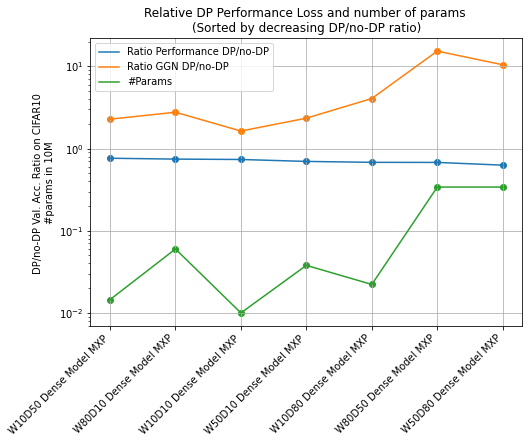

In [15]:
# Plot Nr. 3 

# TODO: we could also think about plotting the relation to the #params for each 
# architecture type separately (e.g. ResNet18, ResNet50, ResNet152, etc.)

# order based on decreasing DP/no-DP ratio
selected_df["dp_nodp_ratio"] = selected_df["dp_performance"]/selected_df["nodp_performance"]
selected_df["dp_nodp_ratio_GGNs"] = selected_df["dp_GGN"]/selected_df["nodp_GGN"]

ratio_dp_nodp = selected_df.sort_values("dp_nodp_ratio", ascending=False)["dp_nodp_ratio"]
new_model_sizes = selected_df.sort_values("dp_nodp_ratio", ascending=False)["size"]
new_model_names = selected_df.sort_values("dp_nodp_ratio", ascending=False).index

new_scale_dp_nodp_GGNs = selected_df.sort_values("dp_nodp_ratio", ascending=False)["dp_nodp_ratio_GGNs"]

print(f"DP/no-DP performance ratio: {ratio_dp_nodp}")

width = 0.35
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])

axis.scatter(new_model_names, ratio_dp_nodp)
axis.plot(new_model_names, ratio_dp_nodp, label="Ratio Performance DP/no-DP")

axis.scatter(new_model_names, new_scale_dp_nodp_GGNs)
axis.plot(new_model_names, new_scale_dp_nodp_GGNs, label="Ratio GGN DP/no-DP")

axis.scatter(new_model_names, new_model_sizes/10000)
axis.plot(new_model_names, new_model_sizes/10000, label="#Params")

axis.set_ylabel('DP/no-DP Val. Acc. Ratio on CIFAR10 \n#params in 10M')
axis.set_title('Relative DP Performance Loss and number of params \n(Sorted by decreasing DP/no-DP ratio)')

plt.legend()
plt.grid()
plt.yscale("log")
plt.xticks(rotation=90 if select_all else 45, ha="right")

## Gradient Graphs
Could be used to reveil more information about the GGN with and without DP for different SOTA models.<br>
Easy variant compared to following section. 

model
W80D10 Dense Model MXP     7.883
W10D50 Dense Model MXP    10.600
W80D50 Dense Model MXP    34.975
W50D10 Dense Model MXP     9.909
W10D80 Dense Model MXP    19.715
W50D80 Dense Model MXP    53.090
W10D10 Dense Model MXP     6.656
Name: dp_GGN, dtype: float64


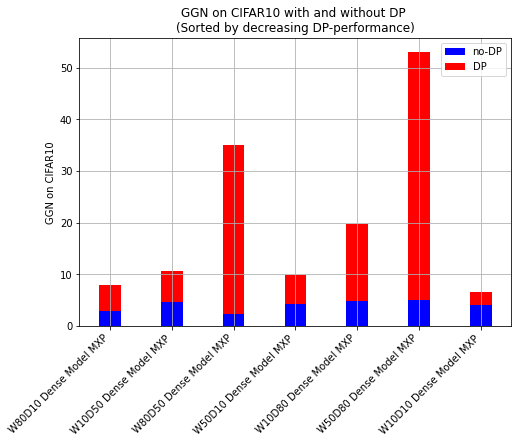

In [16]:
# TODO: think about normalizing with #params as absolute GGNs are larger for many params (higher dim)
# Figure 1 - GGN Value DP and non-DP as part of it

# order based on decreasing DP performance (to be able to compare better with above Plot Nr. 2)
new_dp_performances = selected_df.sort_values("dp_performance", ascending=False)["dp_performance"]
new_nodp_perfomances = selected_df.sort_values("dp_performance", ascending=False)["nodp_performance"]
new_dp_GGNs = selected_df.sort_values("dp_performance", ascending=False)["dp_GGN"]
new_nodp_GGNs = selected_df.sort_values("dp_performance", ascending=False)["nodp_GGN"]
new_model_names = selected_df.sort_values("dp_performance", ascending=False).index

# calculate difference for plot
diff_nodp_dp = new_nodp_perfomances-new_dp_performances
diff_dp_nodp_GGNs = new_dp_GGNs-new_nodp_GGNs

print(new_dp_GGNs)

width = 0.35
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(new_model_names, new_nodp_GGNs, width, color='b', label="no-DP")
axis.bar(new_model_names, diff_dp_nodp_GGNs, width, bottom=new_nodp_GGNs, color='r', label="DP")
axis.set_ylabel('GGN on CIFAR10')
axis.set_title('GGN on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(rotation=90 if select_all else 45, ha="right")
axis.legend()
plt.grid()
plt.show()

model
W80D10 Dense Model MXP    2.848
W10D50 Dense Model MXP    4.654
W80D50 Dense Model MXP    2.278
W50D10 Dense Model MXP    4.228
W10D80 Dense Model MXP    4.848
W50D80 Dense Model MXP    5.073
W10D10 Dense Model MXP    4.074
Name: nodp_GGN, dtype: float64


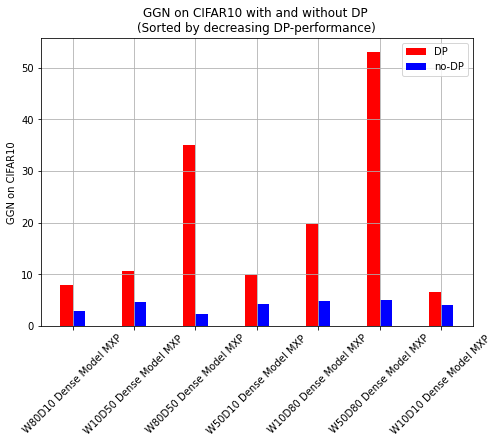

In [17]:
# Figure 1 - GGN Value DP and non-DP as part of it [VERSION 2]

# order based on decreasing DP performance (to be able to compare better with above Plot Nr. 2)
new_dp_performances = selected_df.sort_values("dp_performance", ascending=False)["dp_performance"]
new_nodp_perfomances = selected_df.sort_values("dp_performance", ascending=False)["nodp_performance"]
new_dp_GGNs = selected_df.sort_values("dp_performance", ascending=False)["dp_GGN"]
new_nodp_GGNs = selected_df.sort_values("dp_performance", ascending=False)["nodp_GGN"]
new_model_names = selected_df.sort_values("dp_performance", ascending=False).index

print(new_nodp_GGNs)

width = 0.2
x_axis = np.arange(len(selected_df))

fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(x_axis-width/2, new_dp_GGNs, width, label="DP", color='r')
axis.bar(x_axis+width/2, new_nodp_GGNs, width, label="no-DP", color='b')
axis.set_ylabel('GGN on CIFAR10')
axis.set_title('GGN on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(x_axis, new_model_names, rotation=90 if select_all else 45)
plt.legend()
plt.grid()
plt.show()

DP/-noDP GGN ratio: model
W10D10 Dense Model MXP     1.633775
W50D10 Dense Model MXP     2.343661
W80D10 Dense Model MXP     2.767907
W10D50 Dense Model MXP     2.277611
W10D80 Dense Model MXP     4.066625
W50D80 Dense Model MXP    10.465208
W80D50 Dense Model MXP    15.353380
Name: dp_nodp_ratio_GGNs, dtype: float64
DP/-noDP GGN ratio mean: 555.8309708614867%
DP/-noDP GGN ratio std: 526.8324294994821%


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

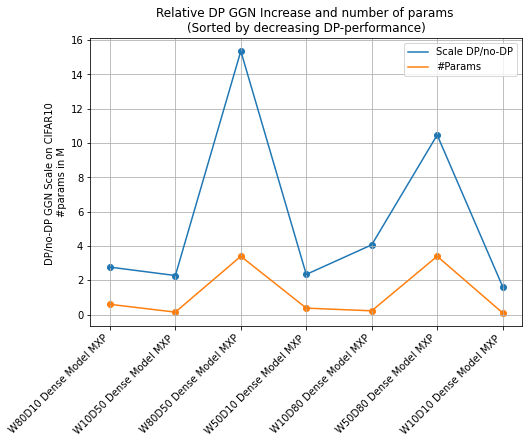

In [18]:
# Figure 2 - GGN DP/-no-DP Scale Factor and ordered by highest scale factor
# Plot Nr. 3 

# TODO: we could also think about plotting the relation to the #params for each 
# architecture type separately (e.g. ResNet18, ResNet50, ResNet152, etc.)

selected_df["dp_nodp_ratio"] = selected_df["dp_performance"]/selected_df["nodp_performance"]
selected_df["dp_nodp_ratio_GGNs"] = selected_df["dp_GGN"]/selected_df["nodp_GGN"]

print(f"DP/-noDP GGN ratio: {selected_df['dp_nodp_ratio_GGNs']}")
print(f"DP/-noDP GGN ratio mean: {selected_df['dp_nodp_ratio_GGNs'].mean()*100}%")
print(f"DP/-noDP GGN ratio std: {selected_df['dp_nodp_ratio_GGNs'].std()*100}%")

# dec_dp_ratio_indices = (-ratio_dp_nodp).argsort()
# dec_dp_scale_indices = (-scale_dp_nodp_GGNs).argsort()
# NOTE: currently sorted by decreasing DP-Performance

# order based on decreasing DP performance (to be able to compare better with above Plot Nr. 2)
new_scale_dp_nodp_GGNs = selected_df.sort_values("dp_performance", ascending=False)["dp_nodp_ratio_GGNs"]
new_model_sizes = selected_df.sort_values("dp_performance", ascending=False)["size"]
new_model_names = selected_df.sort_values("dp_performance", ascending=False).index

width = 0.35
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])

axis.scatter(new_model_names, new_scale_dp_nodp_GGNs)
axis.plot(new_model_names, new_scale_dp_nodp_GGNs, label="Scale DP/no-DP")

axis.scatter(new_model_names, new_model_sizes/1000)
axis.plot(new_model_names, new_model_sizes/1000, label="#Params")

axis.set_ylabel('DP/no-DP GGN Scale on CIFAR10 \n#params in M')
axis.set_title('Relative DP GGN Increase and number of params \n(Sorted by decreasing DP-performance)')

plt.legend()
plt.grid()
plt.xticks(rotation=90 if select_all else 45, ha="right")

## Search Param Graphs
Graphs based on "optimal" L2 clip norms and number of epochs.
Specific questions to answer: 
* Is it better to train longer (with more noise) or shorter (with less noise)? Does this depend on the size of the model?
* What relation does the "optimal" L2-clip norm have with the number of params and the GGN (in the DP case and in the non-DP case)?
* Is the L2 clip norm correlated with the number of epochs? (here it's hard to tell whether any direct causality exists, as more likely both are linked to the number of params)?
* Are there any patterns of different model architectures having similar L2-clips or Epochs (comparison apart from just looking at the number of params)?

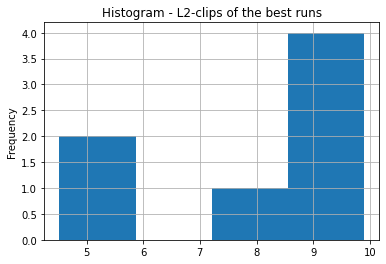

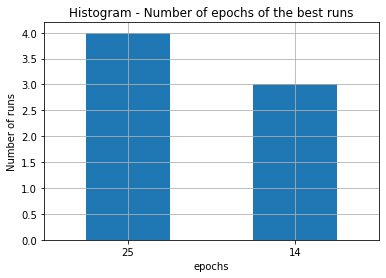

In [19]:
# Figure 1a - Probability Distributions based on optimal params - L2-, Epoch-Histograms 
# NOTE: Could think about a more sophisticated probabilistic modelling

selected_df["best_L2"].plot.hist(
    title="Histogram - L2-clips of the best runs",
    rot=0, 
    bins=4,
)
plt.grid()

# Figure 1b - same for num of epochs
selected_df["best_epoch"].value_counts().plot.bar(
    # with .plot otherwise this is plotted directly into the previous plot
    figure=plt.figure(), 
    title="Histogram - Number of epochs of the best runs",
    ylabel="Number of runs",
    xlabel="epochs",
    rot=0, 
)
plt.grid()


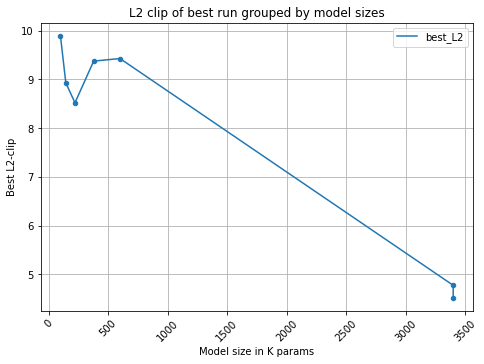

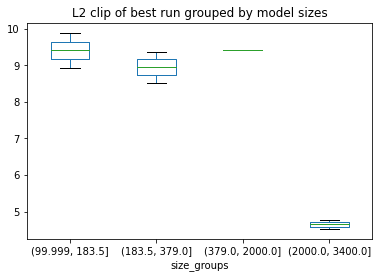

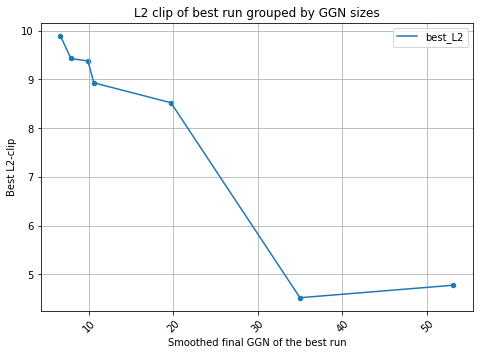

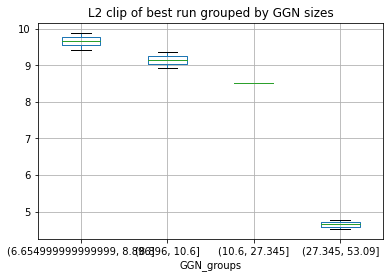

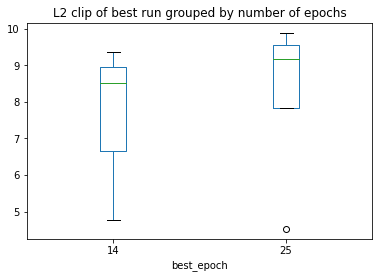

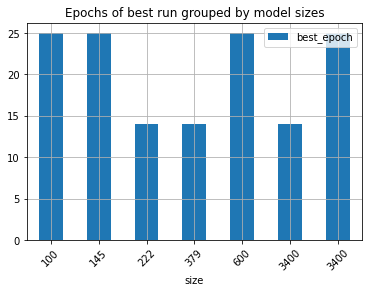

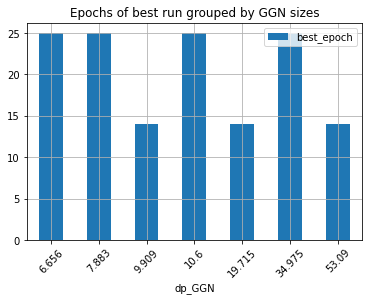

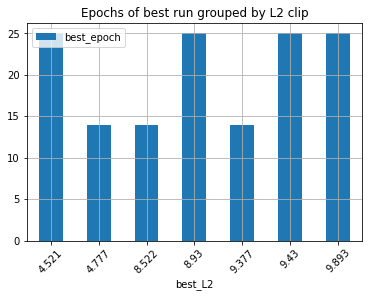

In [20]:
# Figure 2 - L2-, Epoch-Histograms for different clusters: box-plots 
# grouped by num-param-buckets, GGN-buckts, or all "wide"/"deep"/"small"/"big" manual models, L2-buckets, Epoch-buckets

# index arrays based on wanted groups 
# NOTE: check boxplot details here: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot

# L2
# 1. group by num params
title="L2 clip of best run grouped by model sizes"
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
# line plot 
selected_df.sort_values("size").plot("size", "best_L2", ax=axis)
selected_df.sort_values("size").plot.scatter("size", "best_L2", rot=45, ax=axis)
# plt.xscale("log")
plt.ylabel("Best L2-clip")
plt.xlabel("Model size in K params")
plt.title(title)
plt.grid()
# box plot - split in 4 groups
selected_df["size_groups"] = pd.qcut(selected_df["size"], 4)
selected_df.boxplot(column="best_L2", by="size_groups")
# in order to change the title
plt.title(title)
plt.suptitle("")
plt.grid()

# 2. group by ggn
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])
title="L2 clip of best run grouped by GGN sizes"
# line plot 
selected_df.sort_values("dp_GGN").plot.scatter("dp_GGN", "best_L2", ax=axis)
selected_df.sort_values("dp_GGN").plot("dp_GGN", "best_L2", ax=axis, rot=45, title=title)
plt.ylabel("Best L2-clip")
plt.xlabel("Smoothed final GGN of the best run")
plt.grid()

# box plot - split in 4 groups
selected_df["GGN_groups"] = pd.qcut(selected_df["dp_GGN"], 4)
selected_df.boxplot(column="best_L2", by="GGN_groups")
# in order to change the title
plt.title(title)
plt.suptitle("")

# 3. group by epochs
title="L2 clip of best run grouped by number of epochs"
# box plot 
selected_df.boxplot(column="best_L2", by="best_epoch")
# in order to change the title
plt.title(title)
plt.suptitle("")
plt.grid()

# Epochs
# 1. group by num params
title="Epochs of best run grouped by model sizes"
selected_df.sort_values("size").plot.bar("size", "best_epoch", rot=45, title=title)
plt.grid()

# 2. group by ggn
title="Epochs of best run grouped by GGN sizes"
selected_df.sort_values("dp_GGN").plot.bar("dp_GGN", "best_epoch", rot=45, title=title)
plt.grid()

# 3. group by L2
title="Epochs of best run grouped by L2 clip"
selected_df.sort_values("best_L2").plot.bar("best_L2", "best_epoch", rot=45, title=title)
plt.grid()

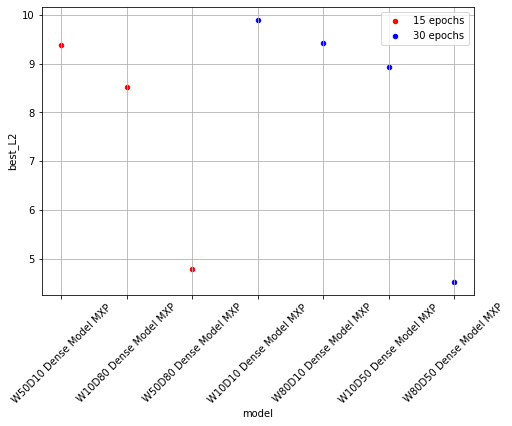

In [21]:
# Figure 3 - Clustering of model architectures based on optimal L2 and Epochs
# NOTE: think about doing kNNs and visualizing clusters
fig = plt.figure(figsize=(14,7)) if select_all else plt.figure()
axis = fig.add_axes([0,0,1,1])

# pass in axis to plot on the same figure
selected_df[selected_df["best_epoch"]==14].reset_index().plot.scatter(
    "model", "best_L2", ax=axis, color="r", label="15 epochs", rot=90 if select_all else 45)
selected_df[selected_df["best_epoch"]==25].reset_index().plot.scatter(
    "model", "best_L2", ax=axis, color="b", label="30 epochs", rot=90 if select_all else 45)
plt.grid()

## Advanced Smoothness Plots
Based on the visual, qualitative smoothness evaluation of the loss landscape in the NIPS paper "How Does Batch Normalization Help Optimization?" by Santurkar et al., NIPS 2018. 

In [13]:
# Figure 1 - Loss Landscape


In [14]:
# Figure 2 - Gradient Predictiveness


In [91]:
# Figure 3 - Effective Beta-Smoothness